# Question 1

For our first trick, we need a volunteer from the audience to toss this magic dice 10 million times... anyone?

### Part 1:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
p = np.array([8,4,2,1,5,7])
p = p/np.sum(p)
print(("Distributions: \n"+"{:.3f} "*6).format(*p))

Distributions: 
0.296 0.148 0.074 0.037 0.185 0.259 


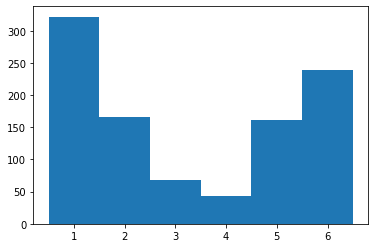

In [18]:
np.random.seed(371)


def one_k_rolls():
    i = 0  # roll counter
    arr = np.zeros(1000)
    while i < 1000:

        x = np.random.randint(1,7)
        if np.random.rand() < p[x-1]:  # cut from the normalized distribution
            arr[i] = x
            i += 1
            
    return arr


b = one_k_rolls()
plt.hist(b, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])  # this is the only way the bins got centered properly
plt.show()

### Part 2:

In [21]:
def meanify(arr):
    return np.sum(arr)/np.size(arr)


print(meanify(b))

3.273


### Part 3:

Time to throw our 1k rolls into the meanifier, 10 thousand times, while tied up and blindfolded inside a locked safe underwater 8)

In [22]:
bigg_means=np.empty(10000)

for i in range(10000):
    bigg_means[i]=meanify(one_k_rolls())

Since our Jupyter Notebook designer has no skills of using a Turkish keyboard, all the written code was translated to English, so to fit the task we can write the cheesy line:

In [28]:
ortalamalar = bigg_means
ortalamalar

array([3.33 , 3.406, 3.471, ..., 3.429, 3.455, 3.463])

And we need to make the old one dissapear (fully digressing from the task at hand):

In [31]:
bigg_means = None

### Part 4:

But it is not enough to make something dissapear, you also have to bring it back:

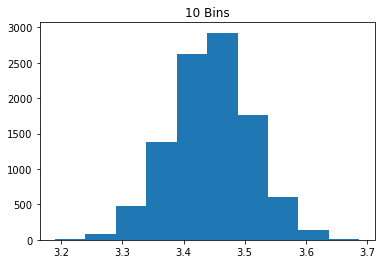

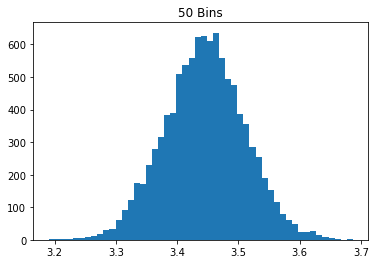

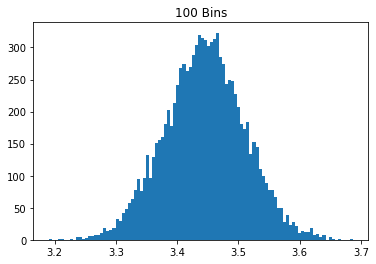

In [37]:
plt.hist(ortalamalar,10)
plt.title("10 Bins")
plt.show()

plt.hist(ortalamalar,50)
plt.title("50 Bins")
plt.show()

plt.hist(ortalamalar,100)
plt.title("100 Bins")
plt.show()

### Bonus part:

Do magicians even have encores?

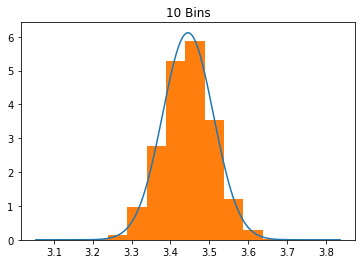

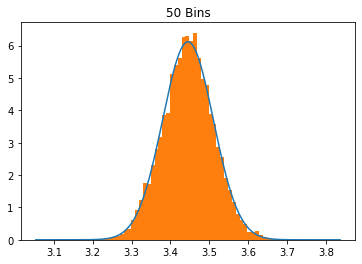

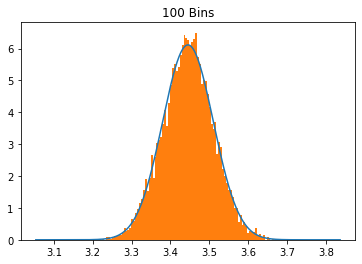

In [38]:
from scipy.stats import norm  # knowing how it is done from last term, we use the precooked code:

mu = meanify(ortalamalar)
sigma = np.std(ortalamalar)
x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)
y = norm.pdf(x, mu, sigma)


plt.plot(x,y)
plt.hist(ortalamalar, 10, density=True)
plt.title("10 Bins")
plt.show()

plt.plot(x,y)
plt.hist(ortalamalar, 50, density=True)
plt.title("50 Bins")
plt.show()

plt.plot(x,y)
plt.hist(ortalamalar, 100, density=True)
plt.title("100 Bins")
plt.show()

# Question 2:

With $A_s$, $A_d$, $B_s$, $B_d$ indicating the silent and defect choices of the two players:

$$
A_s = \frac{2B_s + 0B_d}{2B_s + 0B_d + 3B_s + 1B_d} = \frac{2B_s}{5B_s + B_d}
$$

<br>

$$
A_d = \frac{3 B_s + 1B_d}{2B_s + 0B_d + 3B_s + 1B_d} = \frac{3B_s + B_d}{5B_s + B_d}
$$

<br>

$$
B_s = \frac{2 A_s + 0A_d}{2A_s + 0A_d + 3A_s + 1A_d} = \frac{2A_s}{5A_s + A_d}
$$

<br>

$$
B_d = \frac{3 A_s + 1A_d}{2A_s + 0A_d + 3A_s + 1A_d} = \frac{3A_s + A_d}{5A_s + A_d}
$$

We couldn't really find a way quick enough to actually help the situation of turning these into a matrix set, so we solved it the high school way, seeing that both of these equations have the same relation, solving for A or B would give the result for both, so we just put them in their places:

$$
B_s = \frac{2A_s}{5A_s+A_d} = \frac{2\left(\frac{2B_s}{5B_s + B_d}\right)}{5\left(\frac{2B_s}{5B_s + B_d}\right)+\left(\frac{3B_s + B_d}{5B_s + B_d}\right)} = \frac{\frac{4B_s}{5B_s + B_d}}{\frac{13B_s+B_d}{5B_s + B_d}} = \frac{4B_s}{13B_s + B_d}
$$

<br>

$$
B_s = \frac{4B_s}{13B_s + B_d} \rightarrow \frac{4}{13B_s + B_d} = 1 \rightarrow  \fbox{$13B_s + B_d = 4$}
$$

<br>

We also know that $\fbox{$B_s + B_d = 1$}$, since they are the only two possibilities, so we can get a 2x2 matrix at least:

$$
\begin{bmatrix}1&1\\13&1\end{bmatrix} \begin{bmatrix}B_s\\B_d\end{bmatrix} = \begin{bmatrix}1\\4
\end{bmatrix}
$$

And since the equations for A are the same:

$$
\begin{bmatrix}1&1\\13&1\end{bmatrix} \begin{bmatrix}A_s\\A_d\end{bmatrix} = \begin{bmatrix}1\\4
\end{bmatrix}
$$

In [82]:
coeffs = np.array([[1, 1],[13, 1]])
ress = np.array([1,4])
np.linalg.solve(coeffs, ress)

array([0.25, 0.75])

So we have:

$A_s = 0.25$, $A_d = 0.75$, $B_s = 0.25$, $B_d = 0.75$


Now for the mean expected rewards, we just need to multiply these odds with the four possible combinations:

$$
E_m = (2 \times A_s\, B_s) + (0 \times A_s\,B_d) + (3\times A_d\, B_s) + (1\times A_d\,B_d)
$$

In [97]:
A_s, A_d, B_s, B_d = 0.25, 0.75, 0.25, 0.75

E_m = 2*(A_s * B_s) + 3*(A_d * B_s) + (A_d * B_d)
print(f"\nThat's a total of {E_m}\n\n")


That's a total of 1.25




# Question 4:

The good old tit for tat (TFT) approach seems to work decently in this context, it starts off friendly and then always does what the opponent has done in their last move. If it comes against a fully unfriendly opponent, it loses 3 points in the first round but ties the rest. If it comes against a friendly opponent, it gains all the friendly score, it is not able to punish the friendliness, but it is a better outcome compared to both sides being unfriendly. If it comes against a clone of itself, they both gain all the friendly score, mutualy benefiting. 

TFT is bound to be a popular approach here however, so we don't want to simply tie them, instead we wanted to add a twist on the last move, where we would suddenly go unfriendly, to squeze out an extra three points. However, it is conceivable that this will also be a popular approach, if an opponent also decides to go unfriendly in the last move, both sides will get 1 point, and the twist will fail, ending up tying again but with less points. So instead we can try going unfriendly in the second last move. This is less likely to be done in other algorithms, meaning we will most likely get our extra 3 points, and both sides will get 1 point on the last move.

Bellow here we have coded a few different algorithms (inspired from Wikipedia and Stack Exchange, links in references) and a simple simulation of the game:

In [77]:
import numpy as np
# defining 0 as silent, 1 as defect


def game(ours,opponents):
    if ours==0 and opponents==0:
        return 2,2
    
    if ours==0 and opponents==1:
        return 0,3
    
    if ours==1 and opponents==0:
        return 3,0
    
    if ours==1 and opponents==1:
        return 1,1


def war(strategy1, strategy2, N):
    player1_total, player2_total = 0,0
    history1=np.empty([N,2])
    history2=np.empty([N,2])
    
    for i in range(N):
        player1=strategy1(history1,i,N)
        player2=strategy2(history2,i,N)
        history1[i,0]=history2[i,1]=player1
        history1[i,1]=history2[i,0]=player2
        player1_point,player2_point=game(player1,player2)
        player1_total+=player1_point
        player2_total+=player2_point
        
    print("Our score: {:}\n(Strategy = {:})\n\nTheir score: {:}\n(Strategy: {:})".format(player1_total,strategy1.__name__,player2_total,strategy2.__name__))


def always_defect(hist,i,N):
    return 1


def always_silent(hist,i,N):
    return 0


def grim_trigger(history,i,N):
    if i==0:
        return 0
    else:
        return bool(history[0:i,1].any())  # if the opponent was ever unfriendly, grim will have vengence.

    
def tit_for_tat(history,i,N):
    if i==0:
        return 0
    else:
        return history[i-1,1]


Now let's define the two versions of our strategy and pit them against full defect, TFT, and eachother:

In [78]:
def our_stratV1(history, i, N):
    if i==0:
        return 0
    
    elif i == N-1:
        return 1  # defect on the last round
    
    else:
        return history[i-1,1]


def our_stratV2(history, i, N):
    if i==0:
        return 0
    
    elif i == N-2 or i == N-1:
        return 1  # defect on the last two rounds
    
    else:
        return history[i-1,1]


### Round 1, our strategies vs full on villain:

We expect a loss here of course, with the same outcome on both versions, but true evil can never be destroyed. The few points we lose to a 1v1 against this one, we can mutually regain with the not-truly-evil opponents, friendship wins in the long run!

In [79]:
N = 10000

print("Version 1:")
war(our_stratV1, always_defect, N)

print("\n\nVersion 2:")
war(our_stratV2, always_defect, N)

Version 1:
Our score: 9999
(Strategy = our_stratV1)

Their score: 10002
(Strategy: always_defect)


Version 2:
Our score: 9999
(Strategy = our_stratV2)

Their score: 10002
(Strategy: always_defect)


### Round 2, our strategies vs TFT:

In [80]:
N = 10000

print("Version 1:")
war(our_stratV1, tit_for_tat, N)

print("\n\nVersion 2:")
war(our_stratV2, tit_for_tat, N)

Version 1:
Our score: 20001
(Strategy = our_stratV1)

Their score: 19998
(Strategy: tit_for_tat)


Version 2:
Our score: 20000
(Strategy = our_stratV2)

Their score: 19997
(Strategy: tit_for_tat)


As expected, there is a three point difference, but on the second version both scores went down by 1, since both sides were defect on the last round. So there is a loss there, this strategy will only be rewarding if it comes against an opponent who goes defect on the last round, which brings us toooo...

### Round 3, the two versions against eachother:

In [81]:
war(our_stratV2, our_stratV1, N)

Our score: 20000
(Strategy = our_stratV2)

Their score: 19997
(Strategy: our_stratV1)


So indeed, if we go against a TFT that goes defect on the last round, we get an extra three points. Now we just gotta hope we don't get a horde of full defect opponents.

# References

### Prisoner's dilemma:

- Wiki page:
    - https://en.wikipedia.org/wiki/Prisoner%27s_dilemma


- Prisoner's dilemma algorithms:
    - https://codegolf.stackexchange.com/questions/173065/prisoners-dilemma-with-access-to-opponent
    
    
    
- Ted Ed video (featuring cookies):
    - https://www.youtube.com/watch?v=emyi4z-O0ls
    

### Pirate game/riddle:

- Another Ted Ed video:
    - https://youtu.be/Mc6VA7Q1vXQ
    

- Another Wiki page:
    - https://en.wikipedia.org/wiki/Pirate_game

Along with a healthy amount of aimless brainstorming!